<a href="https://colab.research.google.com/github/JosephKiburu/Moringa-Core/blob/main/Joseph_Kiburu_WEEK_4_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1057]:
# importing our libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [1058]:
# Loading our dataset

df=pd.read_csv('/content/autolib_daily_events_postal_code.csv')
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [1059]:
# Checking our dataset dimensions

df.shape

(16085, 13)

# **TIDYING OUR DATASET**

In [1060]:
# Changing all the column names to lowercase

df.columns=df.columns.str.lower().str.replace(' ','_')
df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [1061]:
# Renaming columns

df.rename(columns={'dayofweek':'day_of_week'}, inplace=True)

In [1062]:
# changing the day of week column to object instead of being an integer

df['day_of_week']=df['day_of_week'].astype(object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


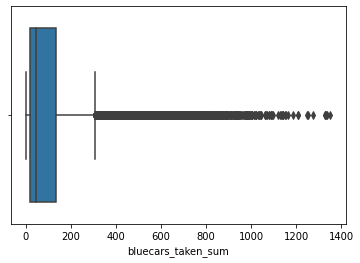

In [1063]:
# Checking for outliers in our 'bluecars_taken_sum' column

sns.boxplot(df['bluecars_taken_sum'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


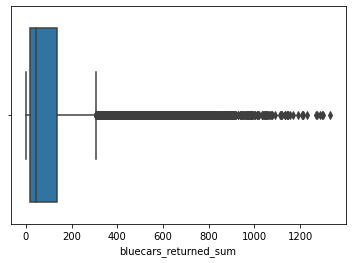

In [1064]:
sns.boxplot(df['bluecars_returned_sum'])

In [1065]:
# Checking for any missing values

df.isnull().any()

postal_code               False
date                      False
n_daily_data_points       False
day_of_week               False
day_type                  False
bluecars_taken_sum        False
bluecars_returned_sum     False
utilib_taken_sum          False
utilib_returned_sum       False
utilib_14_taken_sum       False
utilib_14_returned_sum    False
slots_freed_sum           False
slots_taken_sum           False
dtype: bool

In [1066]:
# Checking for duplicated values

df.duplicated().sum()

0

In [1067]:
# checking the dtypes of our data

df.dtypes

postal_code                int64
date                      object
n_daily_data_points        int64
day_of_week               object
day_type                  object
bluecars_taken_sum         int64
bluecars_returned_sum      int64
utilib_taken_sum           int64
utilib_returned_sum        int64
utilib_14_taken_sum        int64
utilib_14_returned_sum     int64
slots_freed_sum            int64
slots_taken_sum            int64
dtype: object

In [1068]:
# Changing the postal_code column to an object

df['postal_code']=df['postal_code'].astype(object)

In [1069]:
# Changing the date column to datetime

df['date']=pd.to_datetime(df['date'])
df.dtypes

postal_code                       object
date                      datetime64[ns]
n_daily_data_points                int64
day_of_week                       object
day_type                          object
bluecars_taken_sum                 int64
bluecars_returned_sum              int64
utilib_taken_sum                   int64
utilib_returned_sum                int64
utilib_14_taken_sum                int64
utilib_14_returned_sum             int64
slots_freed_sum                    int64
slots_taken_sum                    int64
dtype: object

# **UNIVARIATE ANALYSIS**

Which part of the week do we have most of the bluecars being taken? (weekends or weekdays)



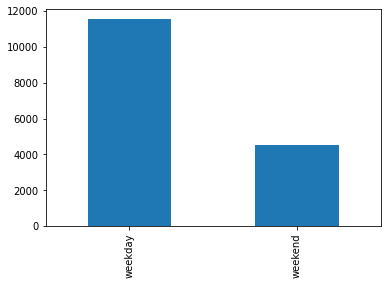

In [1070]:
bluecars_taken=df[['day_type','bluecars_taken_sum']]
bluecars_taken['day_type'].value_counts().plot.bar()

The day of the week with the highest bluecar activity

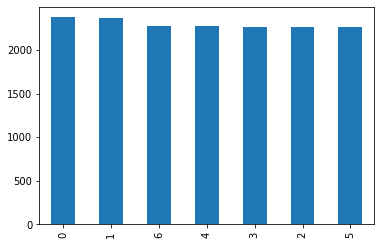

In [1071]:
df['day_of_week'].value_counts().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


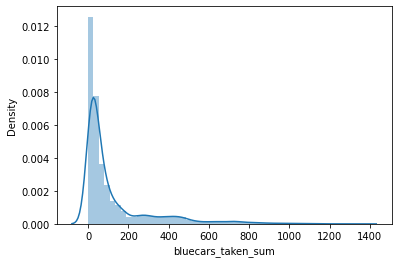

In [1072]:
# A histogram of the 'bluecars_taken_sum' column to check whether it is a normal distribution.
# Turns out it is not.

sns.distplot(df['bluecars_taken_sum'], kde= True, label='Bluecars')

In [1073]:
# The mean number of bluecars taken on weekdays

weekdays=df[df['day_type']=='weekday']
weekdays['bluecars_taken_sum'].mean()


116.0286729036729

In [1074]:
# The mean number of bluecars taken on weekends

weekends=df[df['day_type']=='weekend']
weekends['bluecars_taken_sum'].mean()

151.09006826690157

In [1075]:
# The standard deviation of the number of bluecars taken during the weekday

weekdays['bluecars_taken_sum'].std()

169.62690469970084

In [1076]:
# The standard deviation of the number of bluecars taken during the weekend

weekends['bluecars_taken_sum'].std()

218.5656415891513

In [1077]:
#  The mean number of bluecars taken by postal code 75015

postal_code_75015=df[df['postal_code']==75015]
postal_code_75015['bluecars_taken_sum'].mean()

896.9551282051282

In [1078]:
# The standard deviation of bluecars taken by postal code 75015

postal_code_75015['bluecars_taken_sum'].std()

189.50762493634844

In [1079]:
# Mean of bluecars taken by postal code 75017

postal_code_75017=df[df['postal_code']==75017]
postal_code_75017['bluecars_taken_sum'].mean()

734.4935897435897

In [1080]:
# Standard deviation of the number of bluecars taken by postal code 75017

postal_code_75017['bluecars_taken_sum'].std()

126.22982096390295

# **BIVARIATE ANALYSIS**

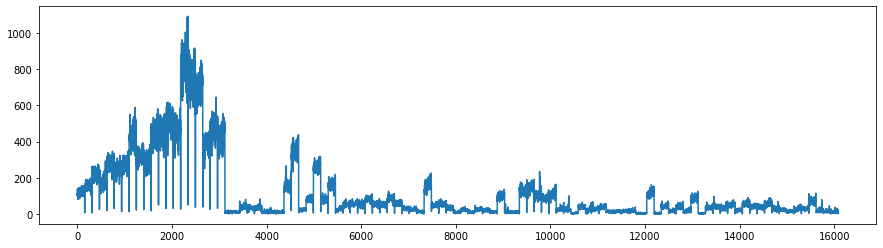

In [1081]:
# Line plot of the number of bluecars taken during the weekdays over the years

plt.figure(figsize=(15,4))
weekdays['bluecars_taken_sum'].plot()

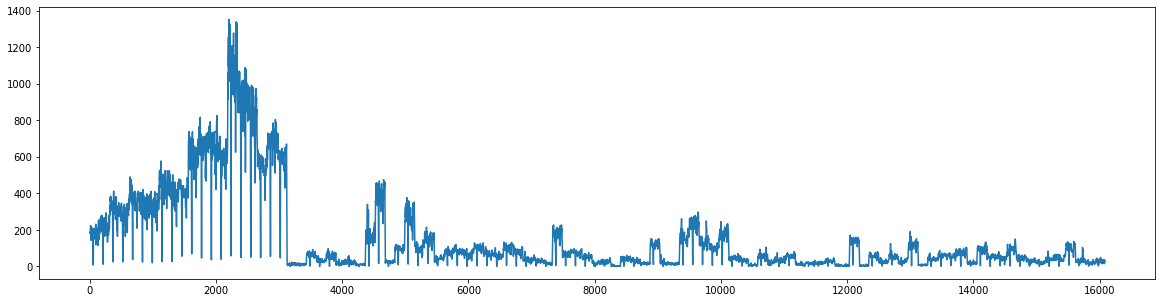

In [1082]:
# Line plot of the number of blue cars taken during the weekends over the years

plt.figure(figsize=(20,5))
weekends['bluecars_taken_sum'].plot()

# **SAMPLING**

In [1083]:
# Finding out the number of weekdays and weekends in our dataset

df['day_type'].value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

In [1084]:
# Stratified sample of the day_type column
strat_sample = df.groupby('day_type', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.01))

# proportion of the number of weekdays and weekdays in our new sample
print(strat_sample['day_type'].value_counts())

# Check the stratified output
print(strat_sample)

weekday    115
weekend     45
Name: day_type, dtype: int64
      postal_code       date  ...  slots_freed_sum slots_taken_sum
148         75001 2018-06-12  ...               16              16
12805       93700 2018-06-14  ...                2               2
124         75001 2018-05-08  ...               30              30
6754        92250 2018-02-19  ...                1               1
3099        75020 2018-05-30  ...              122             119
...           ...        ...  ...              ...             ...
15352       94700 2018-02-17  ...                0               0
6674        92240 2018-05-20  ...                0               0
4312        91400 2018-04-15  ...                0               0
3207        75112 2018-04-01  ...                1               0
360         75003 2018-02-18  ...               64              64

[160 rows x 13 columns]


In [1085]:
# Creating a table with only weekdays

weekdays_sample=strat_sample[strat_sample['day_type']=='weekday']
print(weekdays_sample)



      postal_code       date  ...  slots_freed_sum slots_taken_sum
148         75001 2018-06-12  ...               16              16
12805       93700 2018-06-14  ...                2               2
124         75001 2018-05-08  ...               30              30
6754        92250 2018-02-19  ...                1               1
3099        75020 2018-05-30  ...              122             119
...           ...        ...  ...              ...             ...
14284       94220 2018-03-15  ...                0               0
2365        75016 2018-01-26  ...              224             220
15537       94800 2018-03-21  ...                0               0
7265        92290 2018-04-06  ...                0               0
1783        75012 2018-03-12  ...              105             116

[115 rows x 13 columns]


In [1086]:
# Creating a  table with only weekends

weekends_sample=strat_sample[strat_sample['day_type']=='weekend']
print(weekends_sample)

      postal_code       date  ...  slots_freed_sum slots_taken_sum
3545        78000 2018-04-28  ...                0               0
12013       93390 2018-05-27  ...                0               0
7904        92330 2018-04-21  ...                6               6
4414        92000 2018-02-18  ...                0               0
11186       93300 2018-01-07  ...                0               0
8755        92390 2018-02-04  ...                0               0
465         75003 2018-06-17  ...               51              55
5817        92190 2018-02-18  ...                0               0
13269       94100 2018-06-10  ...                0               0
7557        92310 2018-03-17  ...                0               0
13378       94110 2018-04-14  ...                0               0
11259       93300 2018-03-25  ...                0               0
8652        92380 2018-04-01  ...                0               0
4602        92100 2018-03-25  ...                4            

In [1087]:
# The sample mean for the number of bluecars taken during the weekdays

weekdays_sample['bluecars_taken_sum'].mean()

122.27826086956522

In [1088]:
# The sample standard deviation of the number of bluecars taken during the weekdays

weekdays_sample['bluecars_taken_sum'].std()

177.51222087043024

In [1089]:
# The sample mean for the number of bluecars taken during the weekends

weekends_sample['bluecars_taken_sum'].mean()

132.46666666666667

In [1090]:
# The sample standard deviation for the number of bluecars taken during the weekends

weekends_sample['bluecars_taken_sum'].std()

202.55320288753765

In [1091]:
# Creating a table with postal_codes 75015 and 75017
values=[75017,75015]
codes=df[df.postal_code.isin(values)]
codes=codes[codes['day_type']=='weekday']
codes

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
2184,75015,2018-01-01,1440,0,weekday,781,843,16,21,65,68,202,215
2185,75015,2018-01-02,1438,1,weekday,710,720,21,20,50,49,191,193
2186,75015,2018-01-03,1439,2,weekday,739,752,31,30,65,67,194,201
2187,75015,2018-01-04,1320,3,weekday,669,644,15,15,61,58,165,158
2188,75015,2018-01-05,1440,4,weekday,852,846,21,18,70,71,196,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,75017,2018-06-13,1440,2,weekday,777,765,21,23,42,42,203,202
2646,75017,2018-06-14,1439,3,weekday,710,715,27,27,48,47,185,184
2647,75017,2018-06-15,1440,4,weekday,766,753,23,21,54,53,192,189
2650,75017,2018-06-18,1440,0,weekday,650,639,15,15,36,30,179,177


In [1092]:
codes['postal_code'].value_counts()

75017    112
75015    112
Name: postal_code, dtype: int64

In [1093]:
# Creating a sample for the postal_code column

strat_sample=codes.groupby('postal_code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.45))
strat_sample['postal_code'].value_counts()
print(strat_sample.head())

     postal_code       date  ...  slots_freed_sum slots_taken_sum
2293       75015 2018-04-23  ...              176             180
2185       75015 2018-01-02  ...              191             193
2268       75015 2018-03-29  ...              240             238
2289       75015 2018-04-19  ...              183             181
2339       75015 2018-06-19  ...                7               8

[5 rows x 13 columns]


In [1094]:
# Creating a table for postal code 75015

postal_75015=strat_sample[strat_sample['postal_code']==75015]
print(postal_75015)

     postal_code       date  ...  slots_freed_sum slots_taken_sum
2293       75015 2018-04-23  ...              176             180
2185       75015 2018-01-02  ...              191             193
2268       75015 2018-03-29  ...              240             238
2289       75015 2018-04-19  ...              183             181
2339       75015 2018-06-19  ...                7               8
2275       75015 2018-04-05  ...              217             222
2297       75015 2018-04-27  ...              235             232
2254       75015 2018-03-15  ...              248             231
2259       75015 2018-03-20  ...              208             210
2207       75015 2018-01-24  ...              203             214
2302       75015 2018-05-02  ...              229             231
2328       75015 2018-06-08  ...              267             258
2253       75015 2018-03-14  ...              228             231
2228       75015 2018-02-14  ...              248             248
2272      

In [1095]:
# Standard deviation of bluecars for postal code 75015

postal_75015['bluecars_taken_sum'].std()

153.56908835426216

In [1096]:
# Calculating the mean of the number of bluecars taken in postal code 75015

postal_75015['bluecars_taken_sum'].mean()

815.62

In [1097]:
# Creating a table for postal 75017

postal_75017=strat_sample[strat_sample['postal_code']==75017]
print(postal_75017)

     postal_code       date  ...  slots_freed_sum slots_taken_sum
2595       75017 2018-04-13  ...              241             234
2518       75017 2018-01-23  ...              172             168
2580       75017 2018-03-29  ...              197             198
2584       75017 2018-04-02  ...              179             185
2630       75017 2018-05-29  ...              193             183
2504       75017 2018-01-09  ...              148             150
2643       75017 2018-06-11  ...              216             202
2646       75017 2018-06-14  ...              185             184
2517       75017 2018-01-22  ...              182             175
2615       75017 2018-05-03  ...              200             204
2573       75017 2018-03-22  ...              213             207
2651       75017 2018-06-19  ...                5               5
2614       75017 2018-05-02  ...              220             209
2564       75017 2018-03-13  ...              181             178
2546      

In [1098]:
# Standard deviation of the bluecars taken for postal code 75017

postal_75017['bluecars_taken_sum'].std()


112.1931716063952

In [1099]:
# Calculating the mean of the bluecars taken in postal code 75017

postal_75017['bluecars_taken_sum'].mean()

695.28

# **HYPOTHESIS TESTING**

In [1100]:
# Is the number of cars acquired in area 75017 >/= to the number of cars acquired in area 75015?
# To get the answer, we need to find the difference of the sample means of the bluecars in postal codes 75017 and 75015 using the pooled variance t test

# First we have to get the pooled_variance, assuming the population variance of the two samples are equal.

import math
pooled_variance=((50-1)*(postal_75017['bluecars_taken_sum'].std()**2) + (50-1)*(postal_75015['bluecars_taken_sum'].std()**2))/(50-1)+(50-1)
pooled_variance

# After getting the pooled variance we look for the t statistic

t_statistic=((postal_75017['bluecars_taken_sum'].mean()-postal_75015['bluecars_taken_sum'].mean()))/math.sqrt(pooled_variance*((1/50)+(1/50)))
print(t_statistic)

# Now to get our p_value
# We first have to import the required libraries

from scipy import stats
from scipy.stats import norm

p_value=stats.norm.cdf(t_statistic)
print(p_value)


-3.1616016641503255
0.0007845201848646914


In [1102]:
# Is the number of bluecars acquired during the weekdays >/= that acquired on the weekends?(Hypothesis)
# Assuming equal variance, we are going to use the pooled variance

import math
pooled_variance=((115-1)*(weekdays_sample['bluecars_taken_sum'].std()**2) + (45-1)*(weekends_sample['bluecars_taken_sum'].std()**2))/(115-1)+(45-1)
pooled_variance

# After getting the p_variance we look for the t statistic

t_statistic=((weekdays_sample['bluecars_taken_sum'].mean()-weekends_sample['bluecars_taken_sum'].mean()))/math.sqrt(pooled_variance*((1/115)+(1/45)))
print(t_statistic)

# Now to get our p_value
# We first have to import the required libraries

from scipy import stats
from scipy.stats import norm

p_value=stats.norm.cdf(t_statistic)
p_value

# We can conclude that we will fail to reject our null hypothesis since our p_value, which is greater than our significance level of 0.05, supports the null hypothesis that
# the number of bluecars acquired during the weekdays >/= that acquired on the weekends.

-0.2661697008568776


0.39505425838819375